In [ ]:
%pip install cvxpy

In [2]:
import cvxpy as cp
import numpy as np

# Problem 1


## v

Given A and B in the problem, H will be [AAAB AAB AB B]

We want to minimize $$\|u\|^2_2$$

s.t $$ x_d = Hu$$

### Solution

In [21]:
A = np.array([
    [2, 0, 0],
    [-1, 1, 0],
    [-1, -1, 1]
])
B = np.array([
    [-1],
    [-1],
    [1]
])
x_d = np.array([
    [3],
    [2],
    [2]
])
H = np.hstack((A @ A @ A @ B, A @ A @ B, A @ B, B))
H

array([[-8, -4, -2, -1],
       [ 6,  2,  0, -1],
       [ 7,  5,  3,  1]])

In [60]:
H[:, 1:]

array([[-4, -2, -1],
       [ 2,  0, -1],
       [ 5,  3,  1]])

In [24]:
np.random.seed(1)

# Define the variable
u = cp.Variable((4, 1))

# Define the objective function
objective = cp.Minimize(cp.norm(u, 2))

# Define the constraints
constraints = [
    H @ u == x_d,
]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()
u.value

array([[-1.4076087 ],
       [ 2.88043478],
       [ 0.71195652],
       [-4.68478261]])

In [36]:
def x(k):
  if k == 0:
    return np.array([
        [0],
        [0],
        [0]
    ])
  return A @ x(k-1) + B * u.value[k-1]

x(4).reshape(3)

array([3., 2., 2.])

In [57]:
np.hstack((x(0), x(1), x(2), x(3), x(4)))


array([[ 0.        ,  1.4076087 , -0.06521739, -0.8423913 ,  3.        ],
       [ 0.        ,  1.4076087 , -2.88043478, -3.52717391,  2.        ],
       [ 0.        , -1.4076087 , -1.3423913 ,  2.31521739,  2.        ]])

### Visualization

Optimal value of u:
[[-1.4076087 ]
 [ 2.88043478]
 [ 0.71195652]
 [-4.68478261]]


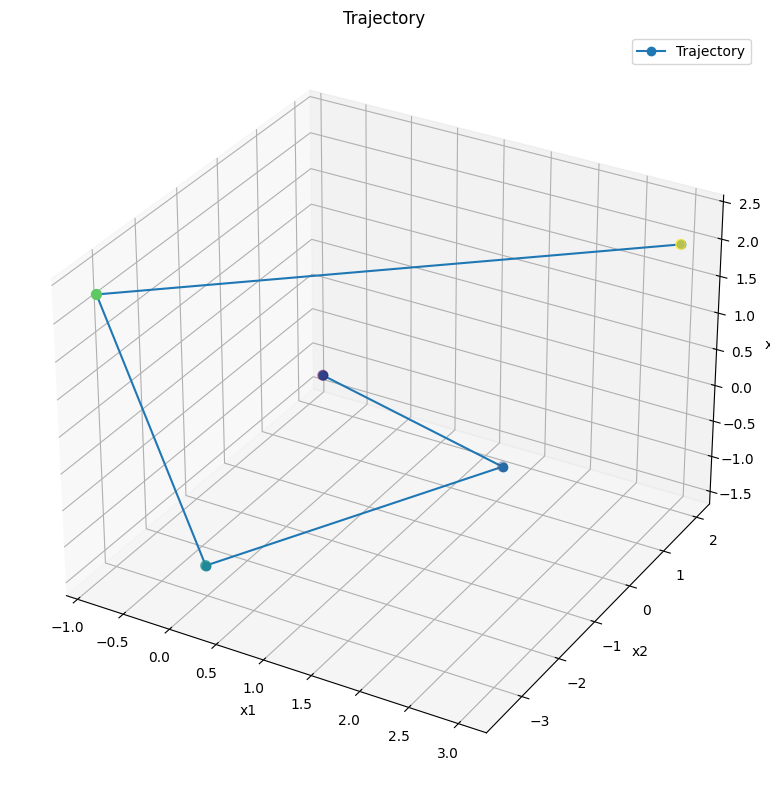

In [52]:
import numpy as np
import matplotlib.pyplot as plt

print("Optimal value of u:")
print(u.value)

# Create grid and compute objective values
x1, x2, x3 = np.hstack((x(0), x(1), x(2), x(3), x(4)))
x1, x2, x3 = x1.reshape(5, 1), x2.reshape(5, 1), x3.reshape(5, 1)

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, x2, x3, '-o', label='Trajectory')
scatter = ax.scatter(x1, x2, x3, c=range(5), cmap='viridis', s=50)

ax.set(xlabel='x1', ylabel='x2', zlabel='x3', title='Trajectory')

ax.legend()
plt.tight_layout()
plt.show()

## vi

### Solution

In [89]:
np.random.seed(1)

# Define the variable
u = cp.Variable((4, 1))

# Define the objective function
objective = cp.Minimize(cp.norm(u, 2))

# Define the constraints
constraints = [
    H @ u == x_d,
    H @ u <= 3.3,
    - H @ u <= 3.3,
    H[:, 1:] @ u[:3] <= 3.3,
    -H[:, 1:] @ u[:3] <= 3.3,
    H[:, 2:] @ u[:2] <= 3.3,
    -H[:, 2:] @ u[:2] <= 3.3,
    H[:, 3:] @ u[:1] <= 3.3,
    -H[:, 3:] @ u[:1] <= 3.3,
]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

u.value

5.744224152811634

In [67]:
np.hstack((x(0), x(1), x(2), x(3), x(4)))

array([[ 0.        ,  1.48333333, -0.21666667, -0.76666667,  3.        ],
       [ 0.        ,  1.48333333, -3.18333334, -3.3       ,  2.        ],
       [ 0.        , -1.48333333, -1.26666667,  2.46666667,  2.        ]])

### Visualization

Optimal value of u:
[[-1.48333333]
 [ 3.18333334]
 [ 0.33333333]
 [-4.53333333]]


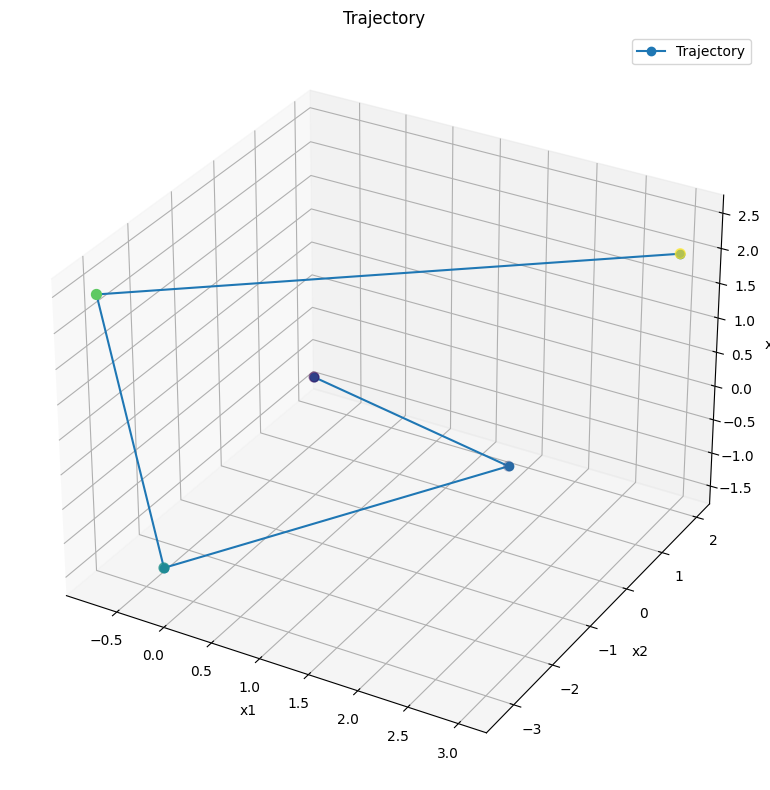

In [68]:
import numpy as np
import matplotlib.pyplot as plt

print("Optimal value of u:")
print(u.value)

# Create grid and compute objective values
x1, x2, x3 = np.hstack((x(0), x(1), x(2), x(3), x(4)))
x1, x2, x3 = x1.reshape(5, 1), x2.reshape(5, 1), x3.reshape(5, 1)

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, x2, x3, '-o', label='Trajectory')
scatter = ax.scatter(x1, x2, x3, c=range(5), cmap='viridis', s=50)

ax.set(xlabel='x1', ylabel='x2', zlabel='x3', title='Trajectory')

ax.legend()
plt.tight_layout()
plt.show()

# Problem 2

$$\|Ax - b \| = \|Ax - Ax^* + v \| = \|A(x - x^*) + v \| = \|Ae + v \| $$

In [82]:
A = np.array([
    [1, 1, 1],
    [-1, 1, 0],
    [-1, -1, 1],
    [1, 0, 1],
    [-1, 1, 1],
    [0, -1, 1]
])
x_star = np.array([
    [1],
    [1],
    [1]
])
t1, t2 = np.meshgrid(np.linspace(-2,2,81), np.linspace(-2,2,81))
t1_t2 = np.column_stack([t1.ravel(), t2.ravel()])

## i

In [92]:
l1_errors = dict()
l2_errors = dict()

for t1, t2 in t1_t2:
  v = np.array([
      [t1],
      [0],
      [0],
      [0],
      [t2],
      [0]
  ])
  l2_e = cp.Variable((3, 1))
  l1_e = cp.Variable((3, 1))

  l2_objective = cp.Minimize(cp.norm(A @ l2_e + v, 2))
  l1_objective = cp.Minimize(cp.norm(A @ l1_e + v, 1))

  l2_problem = cp.Problem(l2_objective)
  l1_problem = cp.Problem(l1_objective)

  l2_problem.solve()
  l1_problem.solve()

  l1_errors[(t1, t2)] = np.linalg.norm(l1_e.value)
  l2_errors[(t1, t2)] = np.linalg.norm(l2_e.value)

## ii

Optimal value of u:
[[-1.48333333]
 [ 3.18333334]
 [ 0.33333333]
 [-4.53333333]]
(4504, 3)
(2057, 3)


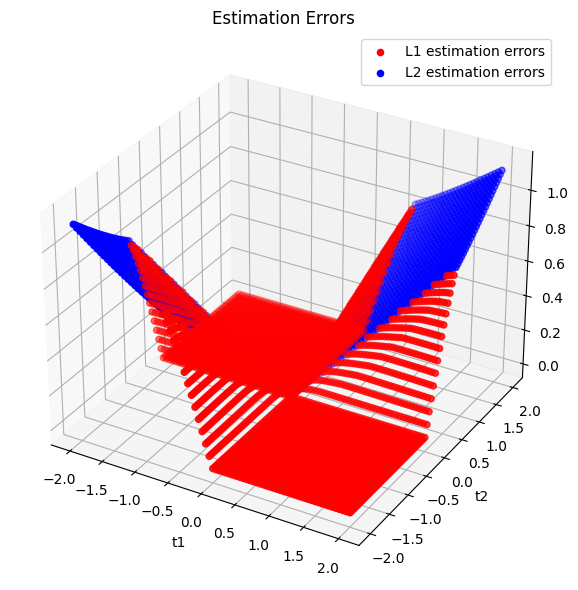

In [126]:
import numpy as np
import matplotlib.pyplot as plt

print("Optimal value of u:")
print(u.value)

# Create grid and compute objective values
l1_grid = np.array([])
l2_grid = np.array([])
for t1, t2 in t1_t2:
  l1_error = (t1, t2, l1_errors[(t1, t2)])
  l2_error = (t1, t2, l2_errors[(t1, t2)])
  if l1_error[2] < l2_error[2]:
    if len(l1_grid) == 0:
      l1_grid = np.array([list(l1_error)])
    else:
      l1_grid = np.vstack((l1_grid, list(l1_error)))
  else:
    if len(l2_grid) == 0:
      l2_grid = np.array([list(l2_error)])
    else:
      l2_grid = np.vstack((l2_grid, list(l2_error)))

print(l1_grid.shape)
print(l2_grid.shape)

l1_x1, l1_x2, l1_x3 = l1_grid[:,0], l1_grid[:, 1], l1_grid[:, 2]
l2_x1, l2_x2, l2_x3 = l2_grid[:,0], l2_grid[:, 1], l2_grid[:, 2]

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(l1_x1, l1_x2, l1_x3, c='red', label='L1 estimation errors')
ax.scatter(l2_x1, l2_x2, l2_x3, c='blue', label='L2 estimation errors')
ax.set(xlabel='t1', ylabel='t2', zlabel='e', title='Estimation Errors')

ax.legend()
plt.tight_layout()
plt.show()